In [8]:
import os
import sys
import glob

sys.path.append('../')

import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
sns.set_style("whitegrid")

from src.get_block_positions import get_eth_tricrypto_positions

# Calculate


In [3]:
lp_balance = 100
cache_dir = "../data/block_positions_for_amount"

In [5]:
get_eth_tricrypto_positions(
    cache_dir=cache_dir,
    node_provider_https=f"https://eth-mainnet.alchemyapi.io/v2/{os.getenv('ALCHEMY_API_KEY')}",
    block_steps=10000,
    lp_amount=lp_balance,
)

2021-10-31:01:46:47,538-4s INFO [get_position_multicall.py get_position_multicall:22] :: Initialising Position Calculator ...
2021-10-31:01:46:49,398-4s INFO [get_position_multicall.py get_position_multicall:73] :: ... done!
2021-10-31:01:46:49,901-4s INFO [get_block_positions.py get_block_positions:114] :: Current block: 13521477
2021-10-31:01:46:49,902-4s INFO [get_block_positions.py get_block_positions:122] :: Fetching Txes between 12821148 : 13521477
2021-10-31:01:46:54,435-4s INFO [get_block_positions.py get_block_positions:126] :: ... done! Num lp token txes: 4352
2021-10-31:01:46:54,787-4s INFO [get_block_positions.py get_block_positions:140] :: Fetching active balances
2021-10-31:01:46:55,228-4s INFO [get_user_lp_tokens.py get_user_lp_tokens:27] :: Contract 0x9D5C5E364D81DaB193b72db9E9BE9D8ee669B652 wasn't created yet.
2021-10-31:01:47:00,860-4s INFO [get_user_lp_tokens.py get_user_lp_tokens:42] :: time taken: 0:00:05.630207
2021-10-31:01:47:06,196-4s INFO [get_user_lp_tokens.p

In [4]:
positions_data_files = glob.glob(f"../data/block_positions_for_amount/*_{lp_balance}.csv")
positions_data = pd.DataFrame()
for filename in positions_data_files:
    csv_data = pd.read_csv(filename)
    positions_data = pd.concat([positions_data, csv_data])

positions_data

,Unnamed: 0,addr,Tether USD,Wrapped BTC,Wrapped Ether,lp_balances,block_number
0,2021-09-15 17:34:35,0xf227704225e260d090736cb3b9bb10e26b5347d1,165918.908036,3.447043,47.565605,1.000000e+20,13231148
1,2021-09-15 17:34:35,0xa2694887f13a7bfee00824ba02b38ae848779136,165918.908036,3.447043,47.565605,1.000000e+20,13231148
2,2021-09-15 17:34:35,0xf3ae3bbdeb2fb7f9c32fbb1f4fbdaf1150a1c5ce,165918.908036,3.447043,47.565605,1.000000e+20,13231148
3,2021-09-15 17:34:35,0x45f1e5d98b7c338cd7cdcbcecc47ddef193674b1,165918.908036,3.447043,47.565605,1.000000e+20,13231148
4,2021-09-15 17:34:35,0x20f9ddfa193d0fe2f73d8b7d749b1355ef019887,165918.908036,3.447043,47.565605,1.000000e+20,13231148
...,...,...,...,...,...,...,...
41,2021-08-09 15:14:02,0xfadafce89ea2221fa33005640acf2c923312f2b9,157138.641638,3.426568,50.115524,1.000000e+20,12991148
42,2021-08-09 15:14:02,0x38a1c011890bc95fd4b43b622e1432c859d097bc,157138.641638,3.426568,50.115524,1.000000e+20,12991148
43,2021-08-09 15:14:02,0xd5431fecbb14f20f8ee68360b586d84d589f9f77,157138.641638,3.426568,50.115524,1.000000e+20,12991148
44,2021-08-09 15:14:02,0x7a16ff8270133f063aab6c9977183d9e72835428,157138.641638,3.426568,50.115524,1.000000e+20,12991148


In [5]:
positions_data = positions_data.rename(columns={positions_data.columns[0]: "Timestamp"})
positions_data = positions_data.set_index(positions_data[positions_data.columns[0]])
positions_data = positions_data.loc[:, positions_data.columns != 'Timestamp']
positions_data.sort_index(inplace=True)
positions_data = positions_data[positions_data["Tether USD"] != 'Error']
positions_data['lp_balances'] = positions_data['lp_balances'].astype(float) * 1e-18
positions_data['Tether USD'] = positions_data['Tether USD'].astype(float)
positions_data['Wrapped BTC'] = positions_data['Wrapped BTC'].astype(float)
positions_data['Wrapped Ether'] = positions_data['Wrapped Ether'].astype(float)
positions_data = positions_data.rename(columns={"Wrapped Ether": "eth", "Wrapped BTC": "btc", "Tether USD": "usdt"})
positions_data


,addr,usdt,btc,eth,lp_balances,block_number
Timestamp,,,,,,
2021-07-15 16:30:45,0x7a16ff8270133f063aab6c9977183d9e72835428,117616.007605,3.669557,61.257577,100.0,12831148
2021-07-17 02:40:00,0x7a16ff8270133f063aab6c9977183d9e72835428,116182.340403,3.698717,61.990845,100.0,12841148
2021-07-18 20:01:00,0xd5431fecbb14f20f8ee68360b586d84d589f9f77,118303.306389,3.733390,60.581910,100.0,12851148
2021-07-18 20:01:00,0x7a16ff8270133f063aab6c9977183d9e72835428,118303.306389,3.733390,60.581910,100.0,12851148
2021-07-20 05:54:52,0x7a16ff8270133f063aab6c9977183d9e72835428,110670.801955,3.734523,64.144125,100.0,12861148
...,...,...,...,...,...,...
2021-10-31 00:37:06,0xa2694887f13a7bfee00824ba02b38ae848779136,192833.974843,3.142194,45.214743,100.0,13521148
2021-10-31 00:37:06,0xf227704225e260d090736cb3b9bb10e26b5347d1,192833.974843,3.142194,45.214743,100.0,13521148
2021-10-31 00:37:06,0x165ce15c339488b3cb15bf5b9639e42d8a008b3b,192833.974843,3.142194,45.214743,100.0,13521148


We look at at analytics for one address.

In [6]:
addr = "0x7a16ff8270133f063aab6c9977183d9e72835428"

In [7]:
addr_positions = positions_data[positions_data.addr == addr]
addr_positions

,addr,usdt,btc,eth,lp_balances,block_number
Timestamp,,,,,,
2021-07-15 16:30:45,0x7a16ff8270133f063aab6c9977183d9e72835428,117616.007605,3.669557,61.257577,100.0,12831148
2021-07-17 02:40:00,0x7a16ff8270133f063aab6c9977183d9e72835428,116182.340403,3.698717,61.990845,100.0,12841148
2021-07-18 20:01:00,0x7a16ff8270133f063aab6c9977183d9e72835428,118303.306389,3.733390,60.581910,100.0,12851148
2021-07-20 05:54:52,0x7a16ff8270133f063aab6c9977183d9e72835428,110670.801955,3.734523,64.144125,100.0,12861148
2021-07-21 22:59:22,0x7a16ff8270133f063aab6c9977183d9e72835428,118747.229229,3.717989,60.066783,100.0,12871148
2021-07-23 08:57:01,0x7a16ff8270133f063aab6c9977183d9e72835428,122192.513826,3.740502,58.870186,100.0,12881148
2021-07-25 01:50:05,0x7a16ff8270133f063aab6c9977183d9e72835428,125131.455353,3.683926,58.251426,100.0,12891148
2021-07-26 11:50:36,0x7a16ff8270133f063aab6c9977183d9e72835428,133581.268074,3.492233,57.140308,100.0,12901148
2021-07-28 05:34:39,0x7a16ff8270133f063aab6c9977183d9e72835428,133843.075737,3.427729,58.460765,100.0,12911148


Plot addr usdt, btc, eth values w.r.t initial coin value:

In [14]:
addr_positions.index = pd.to_datetime(addr_positions.index)

In [19]:
addr_positions.iloc[0, 1]

117616.007605

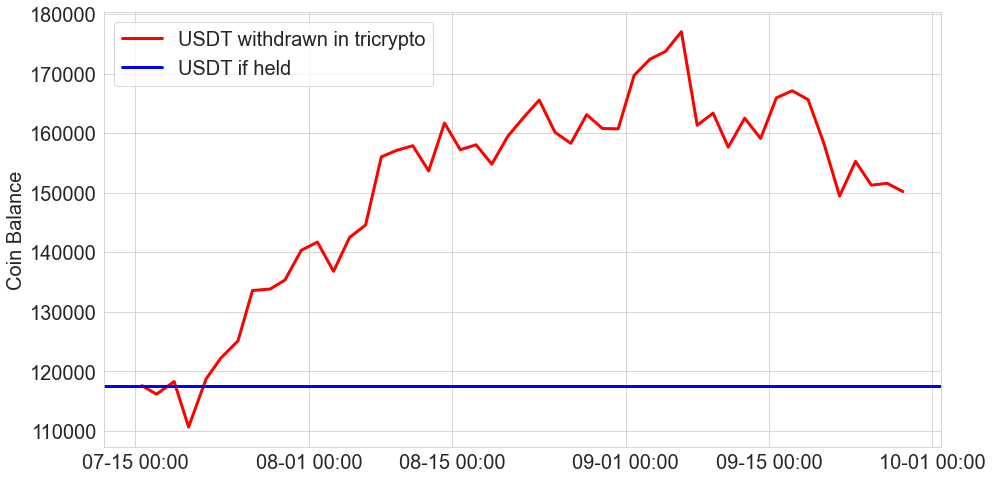

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.plot(addr_positions.index, addr_positions.usdt, label="USDT withdrawn in tricrypto", lw=3, color='r')
ax.axhline(y=addr_positions.iloc[0, 1], label="USDT if held", lw=3, color='b')

ax.set_ylabel("Coin Balance", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
ax.legend(fontsize=20);

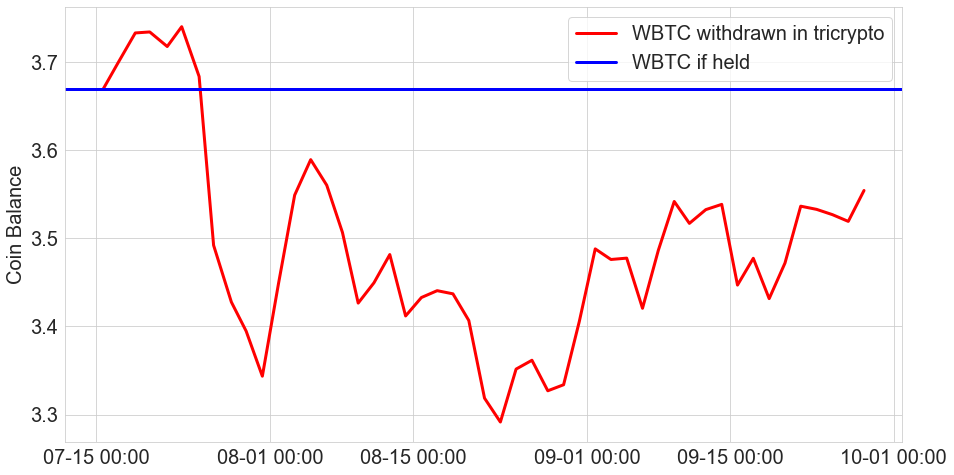

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.plot(addr_positions.index, addr_positions.btc, label="WBTC withdrawn in tricrypto", lw=3, color='r')
ax.axhline(y=addr_positions.iloc[0, 2], label="WBTC if held", lw=3, color='b')

ax.set_ylabel("Coin Balance", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
ax.legend(fontsize=20);

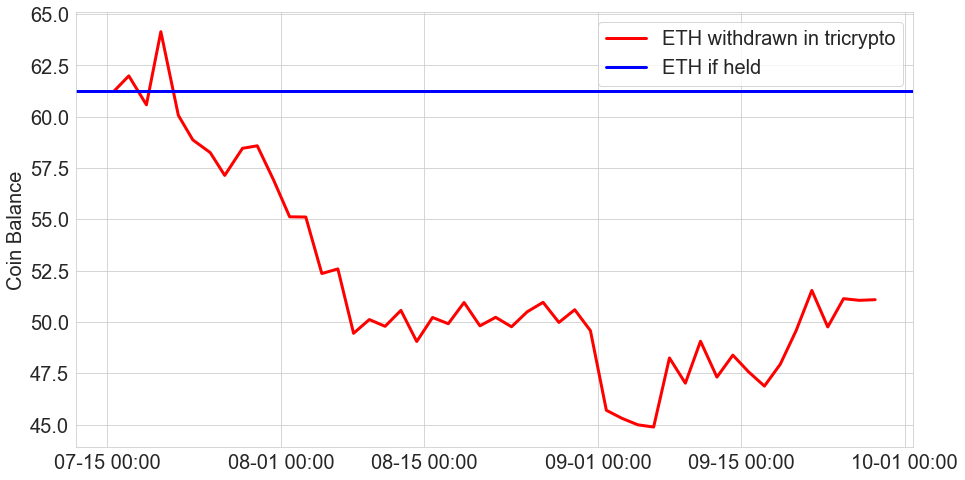

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.plot(addr_positions.index, addr_positions.eth, label="ETH withdrawn in tricrypto", lw=3, color='r')
ax.axhline(y=addr_positions.iloc[0, 3], label="ETH if held", lw=3, color='b')

ax.set_ylabel("Coin Balance", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
ax.legend(fontsize=20);